In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
IMG_SRC = "../images/"
DEFAULT_STYLE = "bmh"
plt.style.use(DEFAULT_STYLE)

# Helper Classes and Functions
* These functions, classes and global variables will be used throughout the notebook in various questions and are hence defined here

In [3]:
def imshow(img, col_map="gray", title="", ax = None, figsize=(10,10)):
    
    if ax == None:
        fig = plt.figure(figsize=figsize)
    
    if col_map == "gray":
        if ax:
            ax.imshow(img, cmap=col_map)
        else:
            plt.imshow(img, cmap=col_map)
    else:
        if ax:
            ax.imshow(img)
        else:
            plt.imshow(img)
    if ax:
        ax.grid(b=False)
        ax.set_title(title)
    else:
        plt.grid(b=False)
        plt.title(title)
        

In [4]:
def pad_image(img, k):
    
    h,w = img.shape
    img_padded = np.zeros((h + (k//2)*2, w + (k//2)*2)).astype('float32')
    h_new, w_new = img_padded.shape
    
    img_padded[k//2:h_new-k//2,k//2:w_new-k//2] = img
    
    return img_padded, h_new, w_new

In [5]:
def conv(img, kernel, absolute=False):
    k = kernel.shape[0]
    
    h,w = img.shape
    img_padded, h_new, w_new = pad_image(img, k)
    
    md = int(k*k/2)
    res = np.zeros((h,w)).astype('float32')
    
    for i in range(h):
        for j in range(w):
            res[i,j] = np.sum((img_padded[i:i+k,j:j+k]*kernel).ravel())
    
    if absolute:
        res = np.abs(res)
        
    res = np.clip(res, 0, 255)
    return res.astype('uint8')

## Union Find Data Structure

In [6]:
class union_find(object):
    
    def __init__(self, size=10000):
        self.arr = [i for i in range(size)]
        self.size = size
    
    def find_root(self, a):
        
        a = int(a)
        if self.arr[a] != a:
            return self.find_root(self.arr[a])
        else:
            return a
    
    def union(self, a, b):
        
        a = int(a)
        b = int(b)
        root_a = self.find_root(a)
        root_b = self.find_root(b)
        
        if root_a == root_b:
            return
        
        if (root_a < root_b):
            self.arr[root_a] = root_b
        else:
            self.arr[root_b] = root_a
    
    def find(self, a, b):
        a = int(a)
        b = int(b)
        
        if self.find_root(a) == self.find_root(b):
            return 1
        return 0

## Rectangular Padding Function

In [7]:
def ab_pad_image(img, a, b):
    
    h,w = img.shape
    img_padded = np.zeros((h + (a//2)*2, w + (b//2)*2)).astype('float32')
    h_new, w_new = img_padded.shape
    
    img_padded[a//2:h_new-a//2,b//2:w_new-b//2] = img
    
    return img_padded, h_new, w_new

## Large Set of Colours

In [8]:
colors_rich = [(65, 143, 113), (127, 50, 99), (241, 128, 216), (140, 143, 159), (76, 31, 178), (182, 44, 131), (87, 120, 9), (152, 210, 50), (142, 18, 200), (120, 81, 182), (139, 37, 12), (177, 86, 166), (110, 201, 37), (168, 105, 20), (225, 199, 61), (173, 224, 129), (7, 127, 19), (231, 180, 44), (221, 153, 11), (97, 69, 247), (141, 16, 238), (105, 79, 123), (106, 167, 211), (29, 232, 83), (222, 52, 158), (132, 126, 84), (190, 169, 102), (29, 120, 64), (139, 243, 231), (32, 193, 227), (206, 179, 221), (195, 247, 8), (70, 177, 13), (81, 233, 189), (70, 146, 150), (193, 131, 12), (33, 241, 116), (14, 101, 26), (246, 141, 185), (78, 95, 30), (157, 251, 108), (175, 90, 85), (44, 90, 183), (195, 129, 215), (28, 56, 150), (143, 234, 149), (202, 122, 103), (123, 194, 215), (102, 133, 62), (199, 161, 192), (88, 84, 97), (41, 120, 23), (118, 127, 208), (93, 189, 96), (57, 67, 38), (8, 63, 150), (216, 44, 92), (192, 39, 236), (56, 50, 157), (191, 175, 171), (150, 25, 210), (232, 192, 181), (96, 60, 158), (158, 69, 234), (148, 181, 36), (20, 79, 147), (53, 42, 234), (84, 35, 12), (200, 166, 145), (55, 12, 133), (30, 187, 103), (222, 48, 251), (182, 176, 136), (52, 146, 189), (242, 192, 177), (212, 120, 239), (131, 92, 63), (60, 171, 234), (48, 135, 65), (128, 239, 77), (132, 112, 100), (214, 131, 203), (137, 111, 27), (238, 168, 191), (237, 155, 105), (197, 202, 242), (154, 81, 245), (242, 238, 84), (109, 229, 130), (250, 51, 14), (46, 68, 57), (145, 91, 64), (214, 10, 91), (36, 188, 138), (66, 206, 172), (157, 103, 63), (254, 110, 21), (186, 231, 115), (173, 29, 161), (76, 28, 200), (203, 233, 96), (145, 116, 125), (236, 85, 139), (98, 184, 44), (7, 11, 198), (254, 1, 73), (138, 220, 49), (231, 159, 48), (237, 68, 80), (140, 127, 83), (176, 88, 127), (76, 140, 179), (116, 86, 47), (194, 61, 255), (25, 51, 15), (212, 125, 226), (43, 179, 4), (148, 208, 171), (231, 76, 55), (105, 0, 15), (37, 84, 132), (69, 201, 41), (190, 142, 151), (185, 51, 5), (126, 208, 113), (89, 100, 145), (34, 100, 170), (99, 189, 218), (235, 225, 194), (151, 208, 111), (232, 26, 173), (171, 158, 210), (81, 15, 124), (7, 37, 54), (168, 119, 240), (247, 234, 40), (34, 127, 121), (180, 117, 212), (203, 99, 86), (252, 151, 167), (129, 154, 157), (199, 81, 194), (153, 54, 0), (205, 73, 132), (131, 192, 70), (172, 14, 141), (189, 166, 174), (217, 2, 189), (237, 172, 236), (249, 203, 110), (114, 185, 131), (20, 229, 218), (71, 125, 17), (43, 137, 213), (140, 206, 84), (85, 112, 156), (50, 100, 15), (189, 75, 249), (64, 46, 209), (33, 252, 255), (20, 166, 79), (209, 58, 99), (28, 243, 200), (107, 221, 64), (120, 48, 206), (114, 203, 49), (239, 167, 5), (136, 12, 87), (20, 28, 117), (34, 123, 35), (95, 27, 68), (6, 165, 70), (38, 15, 249), (189, 194, 228), (100, 110, 49), (213, 184, 249), (134, 140, 147), (56, 157, 165), (184, 57, 111), (23, 232, 223), (185, 11, 35), (233, 127, 170), (74, 46, 174), (231, 159, 85), (136, 140, 123), (76, 133, 216), (191, 215, 86), (222, 70, 117), (152, 71, 61), (67, 28, 113), (200, 45, 69), (245, 62, 17), (211, 118, 63), (213, 10, 82), (197, 255, 83), (12, 7, 77), (109, 18, 159), (36, 11, 202), (114, 251, 184), (196, 221, 142), (100, 134, 178), (165, 45, 20), (204, 112, 206), (144, 249, 80), (236, 104, 238), (95, 157, 157), (15, 231, 213), (46, 37, 226), (12, 83, 244), (193, 111, 214), (69, 122, 179), (119, 118, 84), (167, 70, 234), (84, 41, 210), (120, 111, 136), (255, 90, 187), (67, 66, 197), (218, 129, 207), (194, 62, 67), (220, 14, 164), (164, 60, 25), (69, 146, 253), (219, 162, 180), (198, 155, 124), (15, 168, 28), (15, 70, 120), (33, 101, 157), (61, 54, 27), (98, 135, 57), (162, 140, 164), (87, 75, 210), (152, 17, 94), (193, 82, 203), (77, 128, 50), (105, 159, 140), (225, 116, 6), (62, 76, 145), (118, 104, 129), (111, 193, 120), (173, 73, 32), (112, 37, 111), (182, 228, 232), (55, 255, 184), (64, 106, 81), (106, 21, 63), (101, 214, 25), (250, 95, 89), (9, 245, 231), (235, 148, 106), (96, 165, 115), (58, 105, 33), (134, 89, 130), (159, 113, 37), (204, 234, 160), (230, 92, 18), (78, 215, 171), (123, 56, 240), (197, 12, 99), (226, 94, 81), (152, 43, 11), (113, 43, 220), (52, 173, 89), (58, 170, 111), (27, 113, 153), (193, 213, 110), (254, 186, 65), (255, 247, 242), (204, 97, 182), (197, 212, 110), (199, 204, 157), (174, 6, 60), (197, 205, 131), (82, 109, 133), (132, 75, 65), (41, 116, 12), (179, 89, 211), (197, 219, 226), (236, 108, 35), (225, 23, 123), (250, 115, 111), (187, 109, 49), (165, 6, 104), (129, 70, 127), (8, 189, 41), (175, 107, 209), (253, 120, 148), (184, 121, 115), (226, 75, 28), (41, 6, 247), (63, 139, 235), (1, 64, 196), (98, 145, 255), (120, 134, 198), (215, 135, 119), (214, 211, 187), (65, 120, 222), (40, 17, 152), (127, 192, 199), (193, 88, 248), (223, 130, 192), (68, 118, 33), (3, 112, 47), (13, 120, 162), (76, 160, 227), (161, 111, 57), (200, 8, 162), (77, 130, 100), (62, 42, 48), (123, 175, 243), (24, 223, 251), (3, 105, 47), (24, 200, 148), (193, 239, 137), (172, 40, 4), (58, 23, 109), (174, 94, 250), (44, 73, 63), (153, 36, 48), (215, 87, 96), (205, 235, 130), (95, 40, 72), (173, 87, 112), (62, 8, 234), (253, 240, 234), (239, 14, 87), (185, 70, 158), (171, 89, 113), (22, 79, 91), (0, 107, 242), (251, 223, 157), (112, 58, 74), (114, 159, 91), (104, 156, 169), (18, 213, 3), (62, 162, 167), (145, 23, 19), (91, 151, 212), (121, 86, 65), (90, 69, 202), (3, 36, 115), (57, 114, 149), (16, 164, 35), (219, 130, 166), (87, 153, 14), (159, 255, 209), (141, 22, 246), (68, 89, 29), (88, 150, 245), (104, 158, 12), (71, 117, 64), (101, 78, 27), (39, 77, 255), (6, 28, 112), (15, 12, 179), (231, 247, 117), (163, 43, 155), (13, 222, 237), (209, 3, 123), (185, 154, 18), (179, 140, 52), (61, 216, 81), (190, 22, 23), (175, 51, 15), (99, 128, 20), (216, 121, 156), (139, 1, 95), (16, 112, 66), (70, 99, 253), (192, 7, 215), (102, 23, 8), (197, 187, 101), (176, 208, 90), (147, 81, 21), (233, 82, 20), (7, 208, 15), (116, 2, 172), (249, 20, 121), (197, 8, 132), (27, 195, 155), (228, 146, 171), (191, 232, 251), (6, 179, 73), (190, 154, 250), (97, 153, 9), (187, 132, 102), (178, 236, 120), (26, 158, 66), (54, 237, 231), (64, 130, 52), (125, 34, 1), (9, 103, 32), (239, 177, 124), (244, 145, 200), (54, 213, 161), (189, 254, 130), (216, 110, 74), (52, 140, 107), (153, 122, 214), (150, 87, 175), (235, 137, 6), (201, 195, 244), (16, 147, 230), (158, 220, 32), (80, 177, 146), (91, 206, 235), (31, 113, 171), (79, 29, 48), (85, 135, 103), (185, 17, 2), (96, 213, 18), (0, 117, 175), (200, 115, 38), (5, 246, 89), (142, 97, 66), (185, 115, 130), (123, 125, 4), (36, 61, 196), (224, 147, 96), (90, 84, 76), (185, 65, 200), (50, 17, 85), (135, 181, 110), (5, 152, 141), (176, 145, 26), (0, 222, 172), (188, 153, 0), (246, 111, 104), (47, 241, 70), (215, 57, 247), (72, 10, 204), (205, 226, 16), (208, 126, 7), (53, 66, 78), (158, 191, 205), (0, 190, 222), (207, 17, 239), (111, 156, 94), (129, 213, 218), (225, 63, 223), (161, 78, 88), (93, 98, 79), (90, 167, 238), (238, 124, 77), (145, 142, 225), (102, 223, 96), (132, 59, 82), (137, 62, 64), (198, 12, 74), (169, 234, 203), (45, 54, 76), (40, 127, 175), (217, 110, 45), (138, 37, 100), (210, 150, 97), (196, 21, 1), (85, 38, 122), (142, 244, 209), (248, 127, 61), (101, 15, 216), (97, 237, 97), (86, 163, 249), (148, 11, 19), (119, 108, 144), (99, 35, 11), (129, 188, 38), (110, 151, 101), (63, 90, 122), (249, 62, 34), (100, 67, 91), (14, 232, 255), (34, 11, 21), (110, 143, 43), (225, 29, 37), (195, 204, 16), (238, 157, 193), (251, 93, 142), (8, 223, 174), (206, 53, 217), (61, 122, 127), (178, 101, 226), (28, 60, 19), (141, 1, 21), (117, 105, 220), (68, 23, 243), (223, 238, 6), (177, 53, 181), (170, 97, 85), (115, 204, 232), (45, 136, 24), (41, 215, 149), (43, 22, 86), (111, 247, 195), (23, 172, 3), (110, 187, 190), (198, 179, 221), (8, 4, 122), (105, 34, 182), (67, 244, 5), (19, 127, 73), (102, 179, 172)]

## Morphological Operations Implementation

In [9]:
def erode(img, se):
    
    img = img.astype('float32')
    
    a,b = se.shape
    h,w = img.shape
    if (img.max() > 1):
        img /= 255.
    
    img_padded, h_new, w_new = ab_pad_image(img, a, b)
    
    res = np.zeros(img.shape)
    
    for i in range(h):
        for j in range(w):
            
            curr = img_padded[i:i+a, j:j+b]
            
            check = (curr == se)
            check[se == 0] = 1
            
            if check.all():
                res[i,j] = 1
    
    return (res*255).astype('uint8')

def dilate(img, se):
    
    img = img.astype('float32')
    
    a,b = se.shape
    h,w = img.shape
    if (img.max() > 1):
        img /= 255.
    
    img_padded, h_new, w_new = ab_pad_image(img, a, b)
    
    res = np.zeros(img.shape)
    
    for i in range(h):
        for j in range(w):
            
            curr = img_padded[i:i+a, j:j+b]
            
            check = (curr == se)
            check[se == 0] = 0
            
            if check.any():
                res[i,j] = 1
    
    return (res*255).astype('uint8')

def opening(img, se):
    return dilate(erode(img, se), se)

def closing(img, se):
    return erode(dilate(img, se), se)
                
def morph_gradient(img, se):
    return ((dilate(img, se).astype('int32')) - erode(img, se).astype('int32')).astype('uint8')

def hitormiss(img, se):
    
    im1 = erode(img, se)
    im2 = erode(1-img, 1-se)
    
    return ((im1 & im2)).astype('uint8')
    
    

<hr>

# Q1)

## 1.1

### Function to Skeletonize

In [10]:
def skeletonize(img, se):
    
    k = se.shape[0]
    h,w = img.shape
    res = img.copy()
    
    img_padded, _, _ = pad_image(img, k)
    img_padded //= 255
    
    for i in range(h):
        for j in range(w):
            curr = img_padded[i:i+k, j:j+k]
            check = (curr == se)
            check[se == -1] = 1
            
            if check.all():
                res[i,j] = 0
    return res   

def rotate(se, deg):
    n = deg//90
    return np.rot90(se, n)

In [11]:
def skel_pass(img, S1, S2):
    I2 = skeletonize(img, S1)
    I3 = skeletonize(I2, S2)

    I4 = skeletonize(I3, rotate(S1,90))
    I5 = skeletonize(I4, rotate(S2,90))

    I6 = skeletonize(I5, rotate(S1,180))
    I7 = skeletonize(I6, rotate(S2,180))

    I8 = skeletonize(I7, rotate(S1,270))
    I9 = skeletonize(I8, rotate(S2,270))
    return I9

def iterate_skel(img, S1, S2, max_iter = 500, show_intermediate=False):
    
    prev = img
    cnt = 0
    
    if show_intermediate:
        fig, axes = plt.subplots(2,4,figsize=(15,10))
    
    while cnt < max_iter:
        img_out = skel_pass(prev, S1, S2)
        if (img_out == prev).all():
            break
        cnt += 1
        
        if show_intermediate:
            imshow(img_out, title="Iteration-"+str(cnt), ax = axes[(cnt-1)//4, (cnt-1)%4])
        prev = img_out
        if not show_intermediate:
            print("Iteration -", cnt)
    
    plt.show()
    return img_out

### Skeletonization Kernels

In [12]:
S1 = np.array([
    [ 0, 0, 0],
    [-1, 1,-1],
    [ 1, 1, 1]
])
S2 = np.array([
    [-1, 0, 0],
    [ 1, 1, 0],
    [-1, 1,-1]
])

### Applying to Thumb

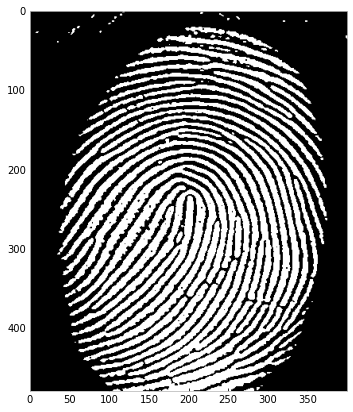

In [13]:
thumb = cv.imread(IMG_SRC+"thumb_print.jpg",0)
_,thumb_thres = cv.threshold(thumb,127,255,cv.THRESH_BINARY_INV)
imshow(thumb_thres, figsize=(7,7))

In [14]:
thumb_skeleton = iterate_skel(thumb_thres, S1, S2)

Iteration - 1
Iteration - 2
Iteration - 3
Iteration - 4
Iteration - 5
Iteration - 6
Iteration - 7
Iteration - 8


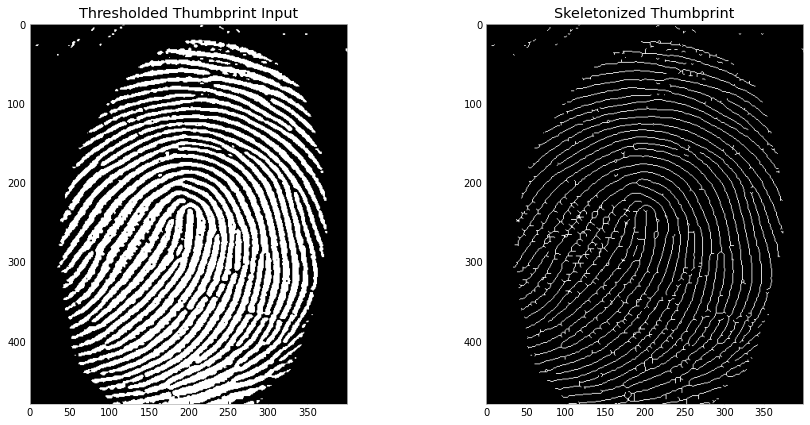

In [17]:
fig = plt.figure(figsize=(15,7))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

imshow(thumb_thres, title="Thresholded Thumbprint Input", ax=ax1)
imshow(thumb_skeleton, title="Skeletonized Thumbprint", ax=ax2)

<hr>

## 1.2

## Role of Structuring Elements S1 and S2

Both the structuring elements try to remove specific structures in the image to perform skeletonization.

### S1
We can see that S1 tries to remove foreground pixels in the image that are at the boundary of the foreground and background, having three horizontal foreground pixels below it and three horizontal background pixels above it. This clearly helps with the skeletonization process. On rotating the kernel $180^\circ$, we can also remove pixels which have three horizontal foreground pixels above the current foreground pixel. On rotating the kernel $90^\circ$ and $270^\circ$, we get the same effect but vertically.

### S2
Similarly, we can see that S2 tries to remove foreground pixels at the boundary of foreground/background, which lie diagonally. Hence the kernel is shaped so as to find foreground pixels that have a 'diagonal' background about it and have a connection with the foreground pixels as well. The 4 diagonal lines are obtained by simply rotating the kernel, like with the previous kernel.

<hr>

## 1.3

## Why multiple passes are required or maybe required?

From the below outputs at each iteration, we can see that multiple iterations are required primarily because the foreground is **not only one pixel thick**. The structuring element that we are using **works on the boundary between the foreground and background**, ie. it removes pixels only at this boundary. Essentially, at each iteration, the **foreground is being thinned** from it's edges.

However, to get a proper skeletonized output, we **do not want to just remove one pixel layer** of thickness from the foreground. To get the best skeleton possible, we would **want to remove as many layers as possible**. As mentioned above, at each iteration, we only remove a one pixel thick layer from the foreground/background boundary. Thus, this is why multiple passes are required or maybe required.

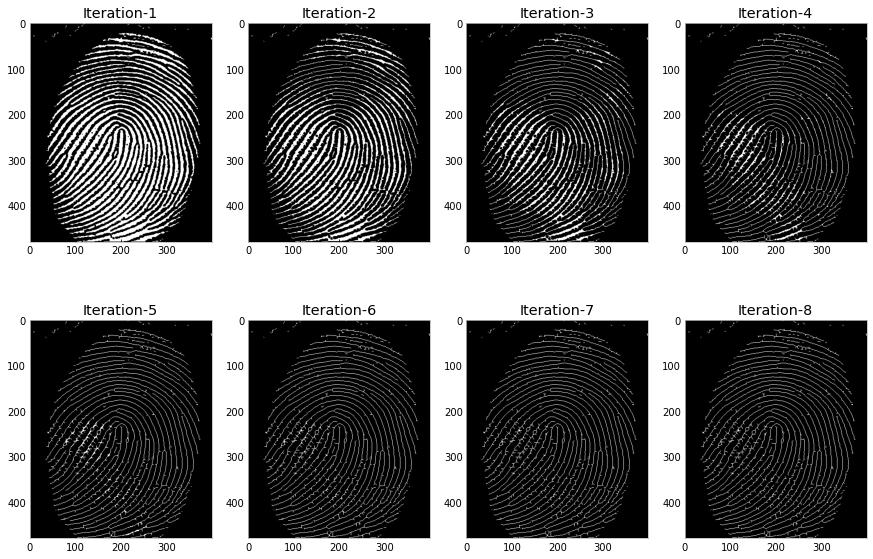

In [18]:
thumb_skeleton = iterate_skel(thumb_thres, S1, S2, show_intermediate=True)

<hr>

## 1.4

## Observations

From the below outputs, we notice the following:
* The number of iterations required for the algorithm to stop depends heavily on the thickness of the foreground, more specifically on the number of pixels thick the foreground is
* The presence of hole(s) in the foreground, especially large ones, cause the skeleton to not resemble the original image as the skeletonization operation provides the skeleton in the middle rather than along a particular edge

<hr>

## Dragon

In [19]:
dragon = cv.imread(IMG_SRC+"dragon.png",0)
_,dragon_thres = cv.threshold(dragon,127,255,cv.THRESH_BINARY)

In [20]:
dragon_skeleton = iterate_skel(dragon_thres, S1, S2)

Iteration - 1
Iteration - 2
Iteration - 3
Iteration - 4
Iteration - 5
Iteration - 6
Iteration - 7
Iteration - 8
Iteration - 9
Iteration - 10
Iteration - 11
Iteration - 12
Iteration - 13
Iteration - 14
Iteration - 15
Iteration - 16
Iteration - 17
Iteration - 18
Iteration - 19
Iteration - 20
Iteration - 21
Iteration - 22
Iteration - 23
Iteration - 24
Iteration - 25
Iteration - 26
Iteration - 27
Iteration - 28
Iteration - 29
Iteration - 30
Iteration - 31
Iteration - 32
Iteration - 33
Iteration - 34
Iteration - 35
Iteration - 36
Iteration - 37
Iteration - 38
Iteration - 39
Iteration - 40
Iteration - 41
Iteration - 42
Iteration - 43
Iteration - 44
Iteration - 45
Iteration - 46
Iteration - 47
Iteration - 48
Iteration - 49
Iteration - 50
Iteration - 51
Iteration - 52
Iteration - 53
Iteration - 54
Iteration - 55
Iteration - 56
Iteration - 57
Iteration - 58
Iteration - 59
Iteration - 60


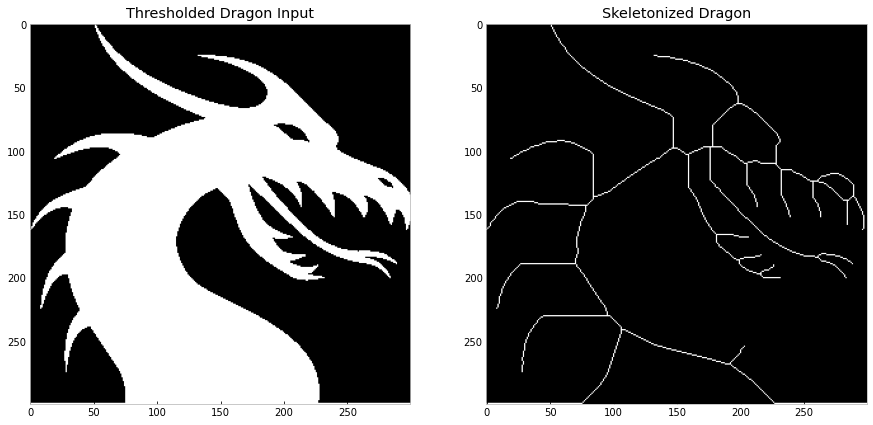

In [21]:
fig = plt.figure(figsize=(15,7))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

imshow(dragon_thres, title="Thresholded Dragon Input", ax=ax1)
imshow(dragon_skeleton, title="Skeletonized Dragon", ax=ax2)

## Butterfly

In [22]:
bfly = cv.imread(IMG_SRC+"butterfly.jpg",0)
_, bfly_thres = cv.threshold(bfly,127,255,cv.THRESH_BINARY)

In [23]:
bfly_skeleton = iterate_skel(bfly_thres, S1, S2)

Iteration - 1
Iteration - 2
Iteration - 3
Iteration - 4
Iteration - 5
Iteration - 6
Iteration - 7
Iteration - 8
Iteration - 9
Iteration - 10
Iteration - 11
Iteration - 12
Iteration - 13
Iteration - 14
Iteration - 15
Iteration - 16
Iteration - 17
Iteration - 18
Iteration - 19
Iteration - 20
Iteration - 21
Iteration - 22
Iteration - 23
Iteration - 24
Iteration - 25
Iteration - 26
Iteration - 27
Iteration - 28
Iteration - 29
Iteration - 30
Iteration - 31
Iteration - 32
Iteration - 33
Iteration - 34
Iteration - 35
Iteration - 36
Iteration - 37
Iteration - 38
Iteration - 39
Iteration - 40
Iteration - 41
Iteration - 42
Iteration - 43
Iteration - 44
Iteration - 45
Iteration - 46
Iteration - 47
Iteration - 48
Iteration - 49
Iteration - 50
Iteration - 51
Iteration - 52
Iteration - 53
Iteration - 54
Iteration - 55
Iteration - 56
Iteration - 57
Iteration - 58
Iteration - 59
Iteration - 60
Iteration - 61
Iteration - 62
Iteration - 63
Iteration - 64
Iteration - 65
Iteration - 66
Iteration - 67
Iter

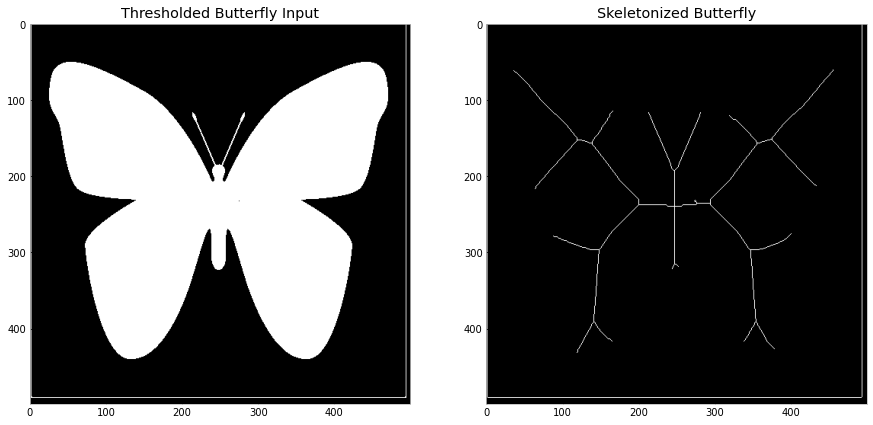

In [24]:
fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

imshow(bfly_thres, title="Thresholded Butterfly Input", ax=ax1)
imshow(bfly_skeleton, title="Skeletonized Butterfly", ax=ax2)

## Keyhole

In [25]:
khole = cv.imread(IMG_SRC+"keyhole.jpg",0)
_, khole_thres = cv.threshold(khole,127,255,cv.THRESH_BINARY)

In [26]:
khole_skeleton = iterate_skel(khole_thres, S1, S2)

Iteration - 1
Iteration - 2
Iteration - 3
Iteration - 4
Iteration - 5
Iteration - 6
Iteration - 7
Iteration - 8
Iteration - 9
Iteration - 10
Iteration - 11
Iteration - 12
Iteration - 13
Iteration - 14
Iteration - 15
Iteration - 16
Iteration - 17
Iteration - 18
Iteration - 19
Iteration - 20
Iteration - 21
Iteration - 22
Iteration - 23
Iteration - 24
Iteration - 25
Iteration - 26
Iteration - 27
Iteration - 28
Iteration - 29
Iteration - 30
Iteration - 31
Iteration - 32
Iteration - 33
Iteration - 34
Iteration - 35
Iteration - 36
Iteration - 37
Iteration - 38
Iteration - 39
Iteration - 40
Iteration - 41
Iteration - 42
Iteration - 43
Iteration - 44
Iteration - 45
Iteration - 46
Iteration - 47
Iteration - 48
Iteration - 49
Iteration - 50
Iteration - 51
Iteration - 52
Iteration - 53
Iteration - 54
Iteration - 55
Iteration - 56
Iteration - 57
Iteration - 58
Iteration - 59
Iteration - 60
Iteration - 61
Iteration - 62
Iteration - 63
Iteration - 64
Iteration - 65
Iteration - 66
Iteration - 67
Iter

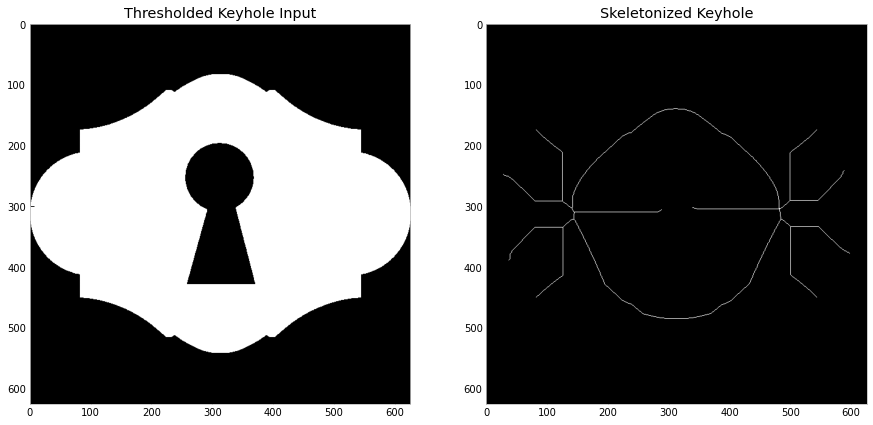

In [27]:
fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

imshow(khole_thres, title="Thresholded Keyhole Input", ax=ax1)
imshow(khole_skeleton, title="Skeletonized Keyhole", ax=ax2)

<hr>

# Q2)

## Process

* The input image is thresholded
* Morphological operations are applied to remove unwanted parts of the image, and keep only the desired/required parts. This is done in the following way:
    * The image is first closed using a circular SE of diameter 4 pixels
    * The result is then opened using a elliptical SE of a = 10, b = 11
    * Next, the result of the above two operations is dilated using the circular SE of diameter 4 pixels
* Next, the colored components function written is applied to uniquely label/color each component

<hr>

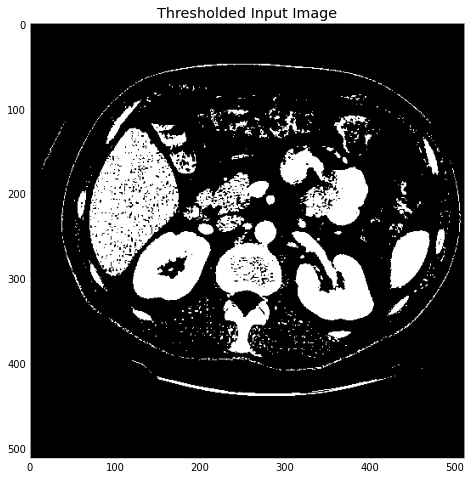

In [28]:
kidney = cv.imread(IMG_SRC+"kidney.jpg",0)
_, kidney_t = cv.threshold(kidney,131,255,cv.THRESH_BINARY)
imshow(kidney_t, title="Thresholded Input Image", figsize=(8,8))

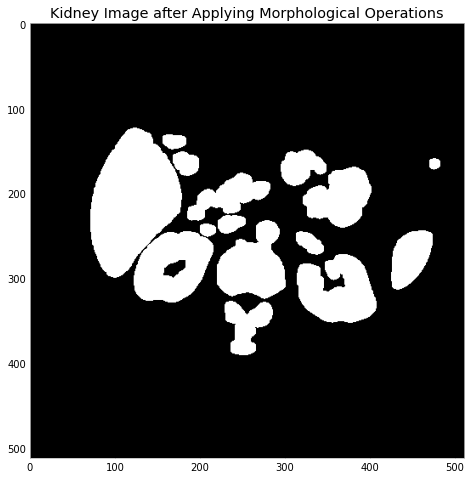

In [29]:
se_1 = cv.getStructuringElement(cv.MORPH_ELLIPSE,(4,4))
se_2 = cv.getStructuringElement(cv.MORPH_ELLIPSE,(10,11))

op = closing(kidney_t, se_1)
op = opening(op, se_2)
kidney_processed = dilate(op, se_1)

imshow(kidney_processed, title="Kidney Image after Applying Morphological Operations", figsize=(8,8))

<hr>

## Colored Components Implementation

This function is implemented in such a way that it can be used in this question as well as in the remaining questions of the assignment.

### Input Arguments

The function accepts 3 input arguments.

* `img` : The input image whose components have to be found
* `rich` : This parameter is used to specify if the number of components in the image expected is low or high. In case the number of components is high ($>14$), then a randomly generated set of colors will be used (defined above as `colors_rich`. Else, if the number of expected components is low ($\le14$), then a handpicked set of colors is used 
* `connectivity` : Denotes which connectivity to use, 4-connectivity or 8-connectivity

### Implementation

The 2 pass algorithm for finding colored components is used in this implementation. 

**On the first pass**, the algorithm assigns a preliminary set of components and maintains the equivalence relationships between the components as and when they are found. 

**On the second pass**, the equivalence relationships found in the first pass are used to connect components marked with different labels in the first pass which are in fact the same.

After this, the colored image is generated using the components found.

### Output

The function gives out 2 output variables.

* `res_colored` : The original image with each component colored differently
* `res_labels` : Each pixel in the original image replaced with it's component's label

In [12]:
def colored_components(img, rich=False, connectivity = 4):
    
    h,w = img.shape
    vals = union_find()

    colors = [
        (0,203,255), (0,0,255), (255,0,203), (239,97,0), (255,246,0), \
        (255,0,0), (232,141,255), (286,254,90), (255,151,81), \
        (117,255,205), (255,192,40), (0,180,0), (255,255,255), (89,89,255),\
        (209,27,255)
    ]
    
    if rich:
        colors = colors_rich
    
    res = np.zeros(img.shape)
    s = 1
    
    # first pass
    for i in range(h):
        for j in range(w):
            
            if img[i,j] == 0:
                res[i,j] = 0
                continue
            
            curr = img[i,j]
            prev = []
            
            if connectivity == 4:
                if i > 0 and res[i-1, j] != 0:
                    prev += [res[i-1,j]]
                if j > 0 and res[i, j-1] != 0:
                    prev += [res[i,j-1]]

                if not len(prev):
                    res[i,j] = s
                    s += 1
                elif len(prev) == 1:
                    res[i,j] = prev[0]
                else:
                    vals.union(*prev)
                    res[i,j] = min(*prev)
            else:
                if i > 0 and res[i-1, j] != 0:
                    prev += [res[i-1,j]]
                if j > 0 and res[i, j-1] != 0:
                    prev += [res[i,j-1]]
                if i > 0 and j > 0 and res[i-1,j-1] != 0:
                    prev += [res[i-1,j-1]]
                if i > 0 and j < w-1 and res[i-1,j+1] != 0:
                    prev += [res[i-1,j+1]]
                
                if not len(prev):
                    res[i,j] = s
                    s += 1
                elif len(prev) == 1:
                    res[i,j] = prev[0]
                else:
                    prev.sort()
                    for comp in prev[1:]:
                        vals.union(prev[0], comp)
                    res[i,j] = prev[0]
    
    # second pass
    for i in range(h):
        for j in range(w):
            
            if res[i,j] == 0:
                continue
            
            res[i,j] = vals.find_root(res[i,j])
    
    unique = np.unique(res)
    c_map = {}
    c_map[0] = (0,0,0)
    s = 0
    for i in unique:
        if int(i) == 0:
            continue
        else:
            c_map[i] = colors[s]
            s += 1
    
    res_c = np.zeros((res.shape[0], res.shape[1], 3))
    
    for i in range(h):
        for j in range(w):
            
            c = res[i,j]
            res_c[i,j,0] = c_map[c][0]
            res_c[i,j,1] = c_map[c][1]
            res_c[i,j,2] = c_map[c][2]
            
    return res_c.astype('uint8'), res
                
    

## Applying to the Processed Kidney Image

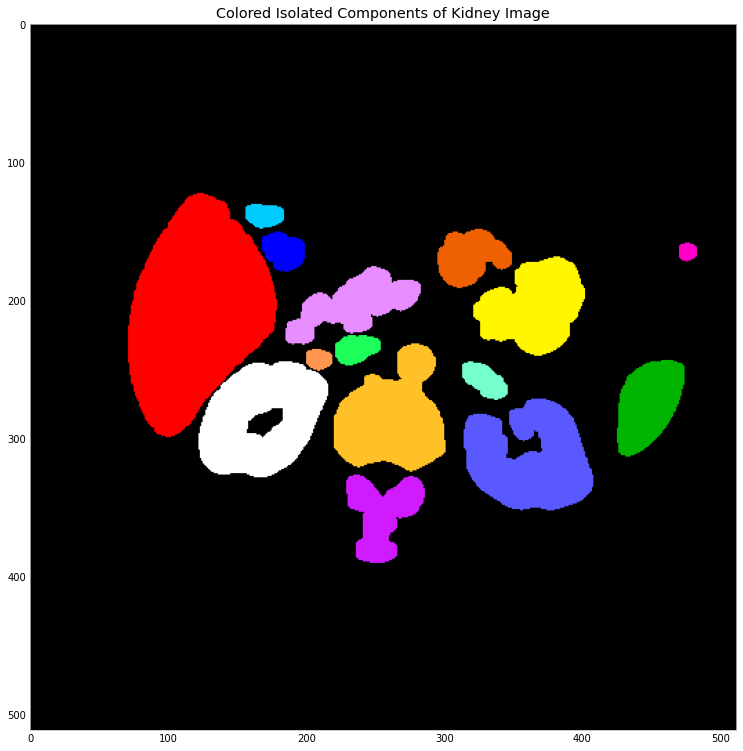

In [31]:
res,_ = colored_components(kidney_processed, connectivity=4)
imshow(res, title="Colored Isolated Components of Kidney Image", figsize=(13,13))

<hr>

# Q3)

## Loading and Thresholding Image

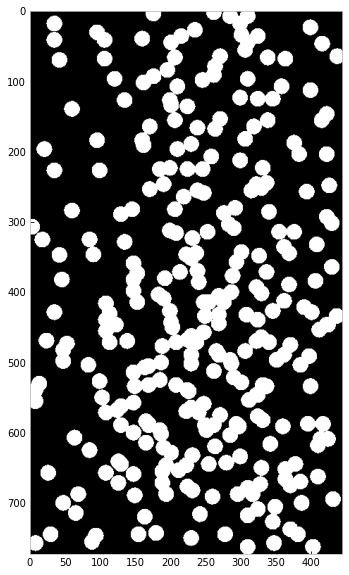

In [32]:
coins = cv.imread(IMG_SRC+"coins.jpg", 0)
_, coins_t = cv.threshold(coins,127,255,cv.THRESH_BINARY)
imshow(coins)

<hr>

## Finds the Colored Components of the Coins

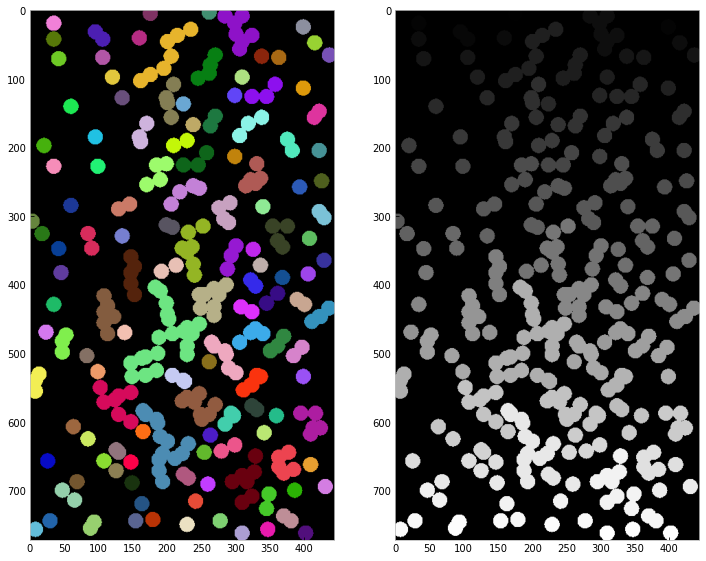

In [33]:
coins_colored, coins_comps = colored_components(coins_t, True, 4)

fig = plt.figure(figsize=(12,12))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
ax1.set_title("Colored Components")
ax2.set_title("")

imshow(coins_colored, ax=ax1)
imshow(coins_comps/coins_comps.max(), ax=ax2)

## 3.a

## Coins that are touching the Boundary of the Image

In [13]:
def find_edge_components(img):
    
    h,w = img.shape
    edge_c = []
    
    for i in range(h):
        if img[i,0] != 0.:
            edge_c += [img[i,0]]
        if img[i,-1] != 0.:
            edge_c += [img[i,-2]]
    for j in range(w):
        if img[0,j] != 0.:
            edge_c += [img[0,j]]
        if img[-1,j] != 0.:
            edge_c += [img[-1,j]]
            
    return np.unique(edge_c)

def keep_components(img, to_keep):
    
    h,w = img.shape
    
    res = np.zeros(img.shape)
    
    for i in range(h):
        for j in range(w):
            
            if img[i,j] in to_keep:
                res[i,j] = 1
    return (res*255).astype('uint8')         

In [14]:
def keep_by_area(coins_comps, thres=500, operation='g'):
    
    h,w = coins_comps.shape
    unique = np.unique(coins_comps)
    counts = [0 for i in range(int(unique.max()+1))]
    
    res = coins_comps.copy()
    
    for i in range(h):
        for j in range(w):
            
            counts[int(res[i,j])] += 1
    
    for i in range(h):
        for j in range(w):
            
            if res[i,j] == 0:
                continue
            
            if operation == 'g':
                if counts[int(res[i,j])] > thres:
                    res[i,j] = 1
                else:
                    res[i,j] = 0
            elif operation == 'l':
                if counts[int(res[i,j])] < thres:
                    res[i,j] = 1
                else:
                    res[i,j] = 0
                    
    return (res*255).astype('uint8')

### Coings that Touch the Edge and are Overlapping with Other Coins

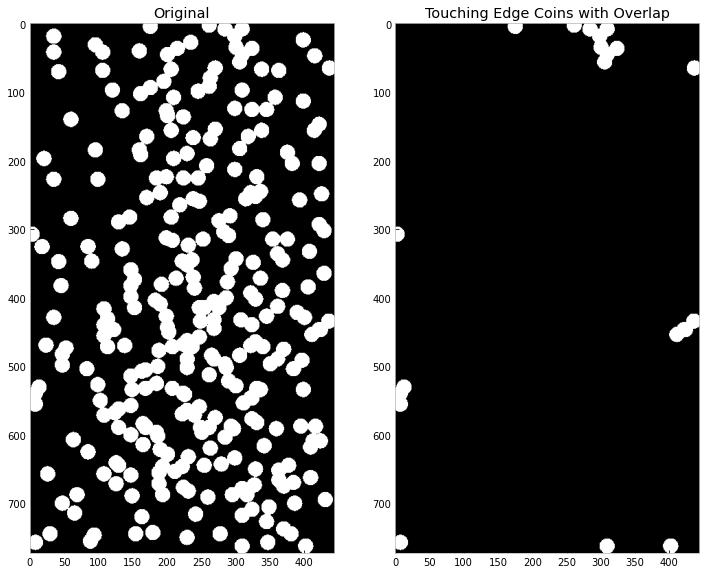

In [36]:
to_keep = find_edge_components(coins_comps)
touching_edge = keep_components(coins_comps, to_keep)

fig = plt.figure(figsize=(12,12))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

imshow(coins_t, title="Original", ax=ax1)
imshow(touching_edge, title="Touching Edge Coins with Overlap", ax=ax2)

### Coings that Touch the Edge and are Not Overlapping with Other Coins

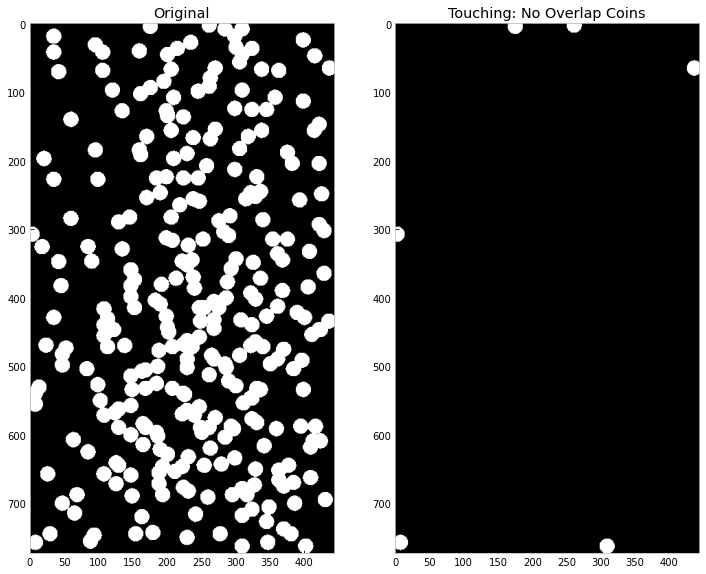

In [37]:
touching_no_overlap = keep_by_area(coins_comps, 383, 'l')

fig = plt.figure(figsize=(12,12))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

imshow(coins_t, title="Original", ax=ax1)
imshow(touching_no_overlap, title="Touching: No Overlap Coins", ax=ax2)

<hr>

## 3.b

## Displaying only Overlapping Coins

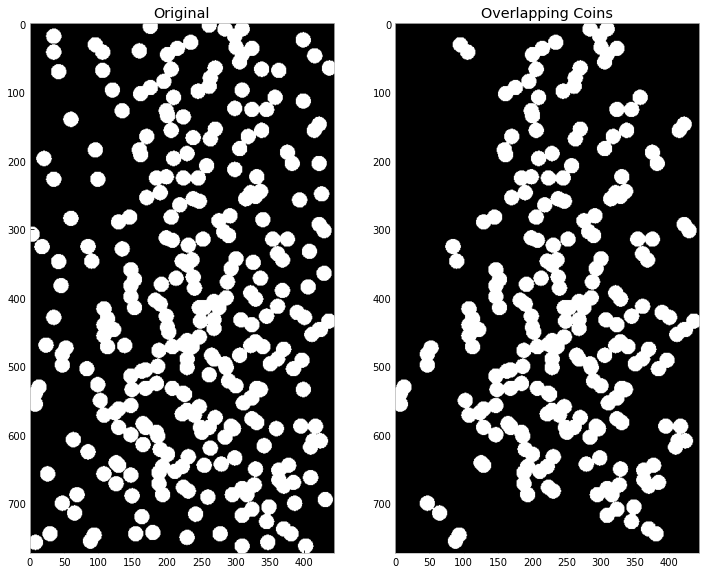

In [38]:
overlapping = keep_by_area(coins_comps, 500, 'g')

fig = plt.figure(figsize=(12,12))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

imshow(coins_t, title="Original", ax=ax1)
imshow(overlapping, title="Overlapping Coins", ax=ax2)

## 3.c

## Displaying only Non Overlapping Coins

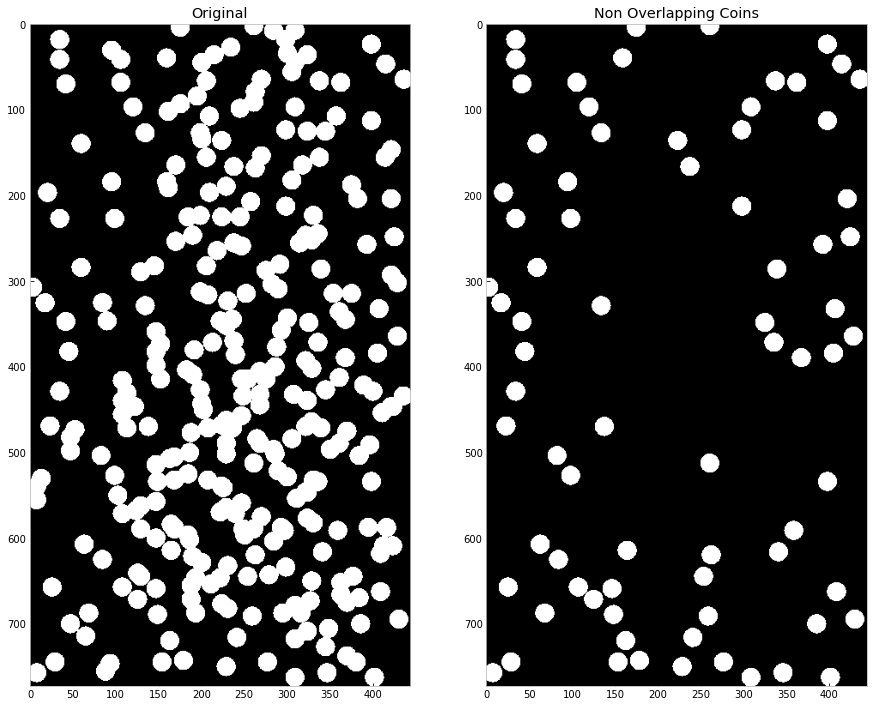

In [39]:
non_overlapping = coins_t - overlapping

fig = plt.figure(figsize=(15,13))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

imshow(coins_t, title="Original", ax=ax1)
imshow(non_overlapping, title="Non Overlapping Coins", ax=ax2)

<hr>

# Q4)

# Displaying Input Image

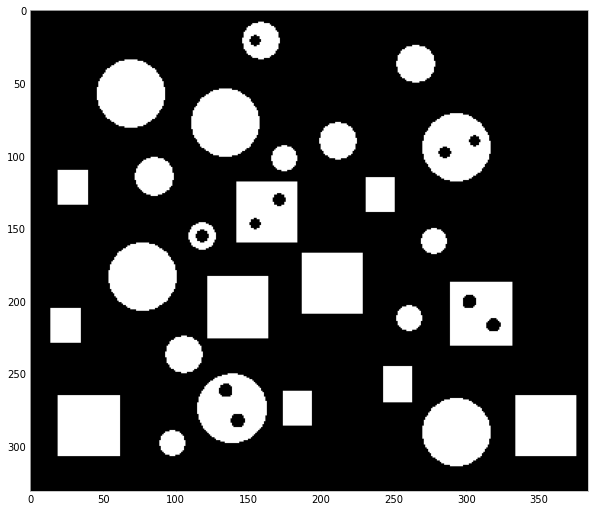

In [40]:
objects = cv.imread(IMG_SRC+"objects.png", 0)
imshow(objects)

<hr>

## Getting Colored Components for Input and its Inverse

In [41]:
objects_inv_colored, objects_inv_comps = colored_components(255-objects, True, 4)

In [42]:
objects_colored, objects_comps = colored_components(objects, True, 4)

<hr>

In [15]:
def get_all_objects(objects_comp):
    
    # holes will be small, so we can remove the largest component as that'd be the background
    h,w = objects_comp.shape
    counts = [0 for i in range(int(objects_comp.max()+1))]
    
    for i in range(h):
        for j in range(w):
            counts[int(objects_comp[i,j])] += 1
    
    comps = np.unique(objects_comp)
    
    comps = np.setdiff1d(comps, np.array(counts).argsort()[-1:])
    return comps

def show_selected_objects(objects_comps, to_keep):
    
    res = np.zeros(objects_comps.shape)
    h,w = objects_comps.shape
    
    for i in range(h):
        for j in range(w):
            
            if objects_comps[i,j] in to_keep:
                res[i,j] = 1
    
    return (res*255).astype('uint8')

def get_visible_components(objects_comps, im_ref):
    
    to_keep = []
    h,w = im_ref.shape
    
    for i in range(h):
        for j in range(w):
            
            if im_ref[i,j]:
                to_keep += [objects_comps[i,j]]
                
    return np.unique(np.array(to_keep))

In [16]:
def get_holes(holes_comp):
    
    # holes will be small, so we can remove the largest component as that'd be the background
    h,w = holes_comp.shape
    counts = [0 for i in range(int(holes_comp.max()+1))]
    
    for i in range(h):
        for j in range(w):
            counts[int(holes_comp[i,j])] += 1
    
    comps = np.unique(holes_comp)
    comps = np.setdiff1d(comps, np.array(counts).argsort()[-2:])
    
    return comps

def get_objects_with_holes(object_inv_comps, holes_comp, objects_comps):
    
    h,w = object_inv_comps.shape
    
    to_keep = []
    prev = -1
    for i in range(h):
        for j in range(w):
            
            c = object_inv_comps[i,j]
            
            if int(c) in holes_comp and j and prev == 0:
                to_keep += [objects_comps[i,j-1]]
            
            prev = int(c)
    
    return np.unique(np.array(to_keep))

<hr>

## 4.a

## Finding and Showing Number of Objects with Holes

There are 6 objects with holes


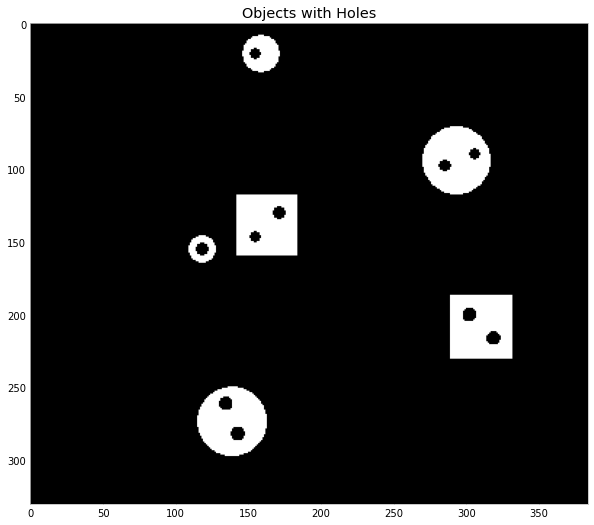

In [45]:
holes_comps = get_holes(objects_inv_comps)
comps_with_holes = get_objects_with_holes(objects_inv_comps, holes_comps, objects_comps)
objects_with_holes = show_selected_objects(objects_comps, comps_with_holes)

print("There are", len(comps_with_holes), "objects with holes")
imshow(objects_with_holes, title="Objects with Holes")

## 4.b

## Finding Number of Square Objects in the Image

In [17]:
def check_square(components, objects_comps):
    
    h,w = objects_comps.shape
    inds = {}
    
    for i in range(h):
        for j in range(w):
            
            c = objects_comps[i,j]
            if c in components:
                if c in inds:
                    if inds[c][0] > i:
                        inds[c][0] = i
                    if inds[c][1] < i:
                        inds[c][1] = i
                        
                    if inds[c][2] > j:
                        inds[c][2] = j
                    if inds[c][3] < j:
                        inds[c][3] = j
                else:
                    inds[c] = [i,i,j,j]
    
    final_comps = []
    for comp in components:
        
        if (inds[comp][1] - inds[comp][0]) == (inds[comp][3] - inds[comp][2]):
            final_comps += [comp]
    
    return np.unique(np.array(final_comps))

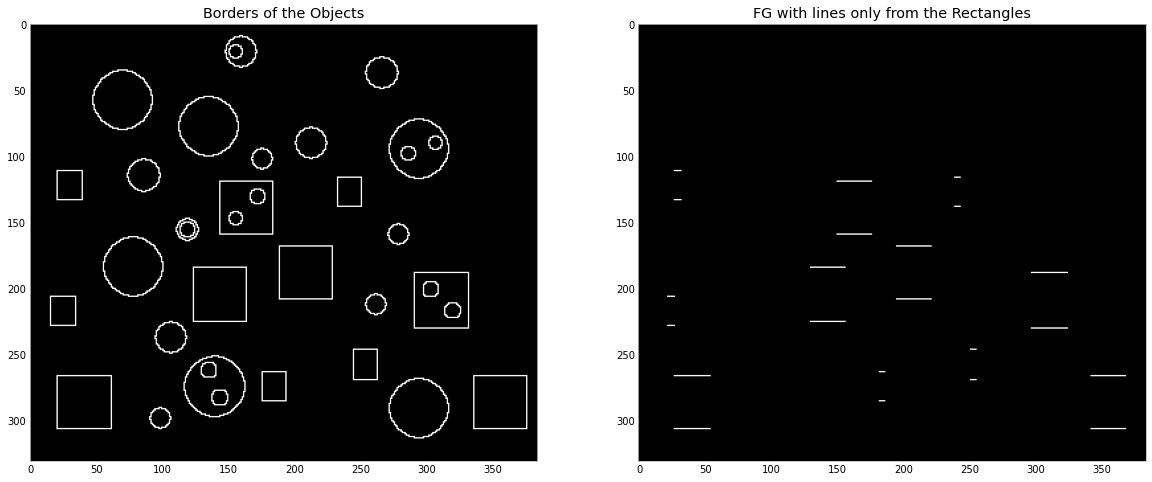

In [47]:
se1 = cv.getStructuringElement(cv.MORPH_RECT,(2,2))
se2 = cv.getStructuringElement(cv.MORPH_RECT,(3,3))
se3 = cv.getStructuringElement(cv.MORPH_RECT,(15,1))

objects_eroded1 = erode(objects, se1)
objects_eroded2 = erode(objects_eroded1, se2)
objects_border = objects_eroded1 - objects_eroded2

objects_rectangle_lines = hitormiss(objects_border, se3)

fig = plt.figure(figsize=(20,20))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

imshow(objects_border, title="Borders of the Objects", ax=ax1)
imshow(objects_rectangle_lines, title="FG with lines only from the Rectangles", ax=ax2)

#### Rectangles

There are 11 rectangles


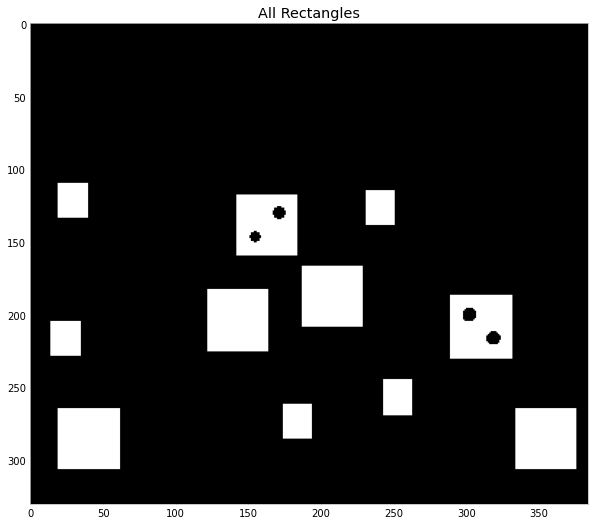

In [49]:
rectangle_components = get_visible_components(objects_comps, objects_rectangle_lines)
objects_rectangles = show_selected_objects(objects_comps, rectangle_components)

print("There are", len(rectangle_components), "rectangles")
imshow(objects_rectangles, title="All Rectangles")

#### Perfect Squares

There are 3 perfect squares


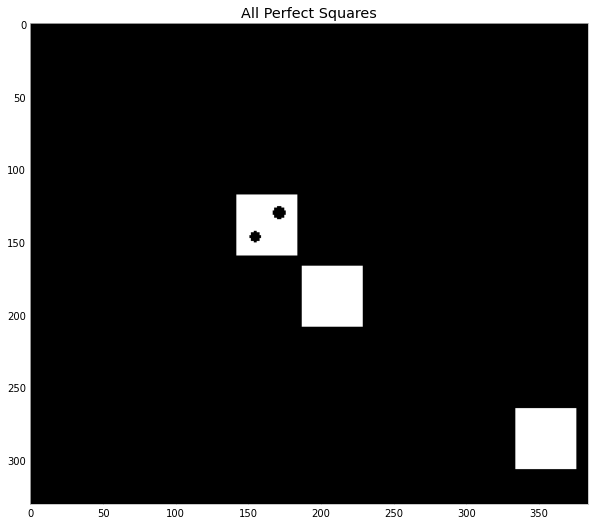

In [51]:
final_square_components = check_square(rectangle_components, objects_comps)
objects_squares = show_selected_objects(objects_comps, final_square_components)

print("There are", len(final_square_components), "perfect squares")
imshow(objects_squares, title="All Perfect Squares")

## 4.c

## Square Objects with Holes

#### Rectangles with Holes

There are 2 rectangles with holes


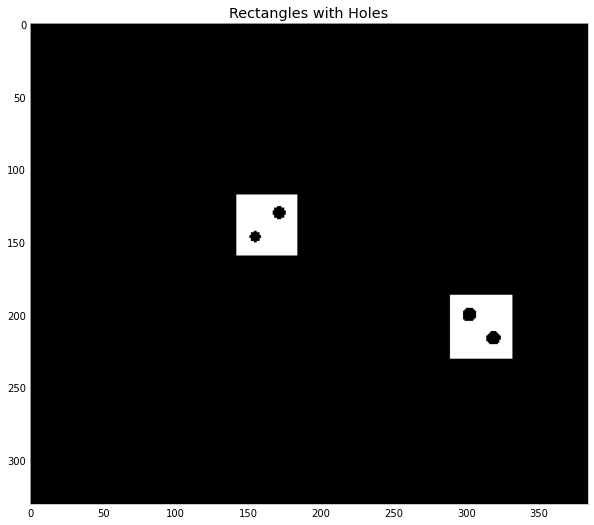

In [52]:
comps_rectangles_with_holes = np.intersect1d(comps_with_holes, rectangle_components)
objects_rectangles_with_holes = show_selected_objects(objects_comps, comps_rectangles_with_holes)

print("There are", len(comps_rectangles_with_holes), "rectangles with holes")
imshow(objects_rectangles_with_holes, title="Rectangles with Holes")

#### Squares with Holes

There is 1 square with holes


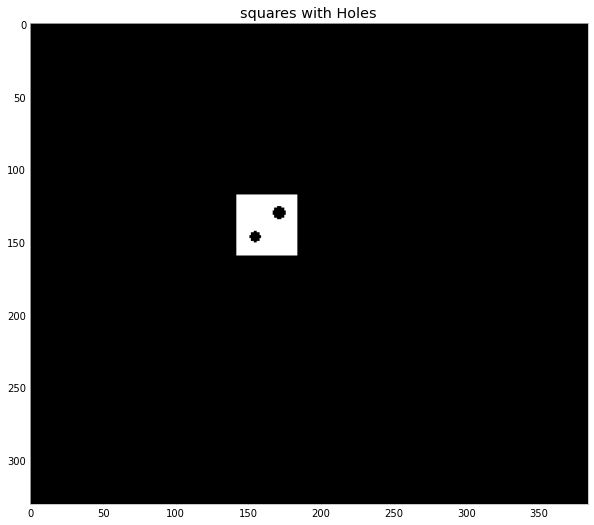

In [53]:
comps_squares_with_holes = np.intersect1d(comps_with_holes, final_square_components)
objects_squares_with_holes = show_selected_objects(objects_comps, comps_squares_with_holes)

print("There is", len(comps_squares_with_holes), "square with holes")
imshow(objects_squares_with_holes, title="squares with Holes")

## 4.d

## Circular Objects with No Holes

There are 12 circles without holes


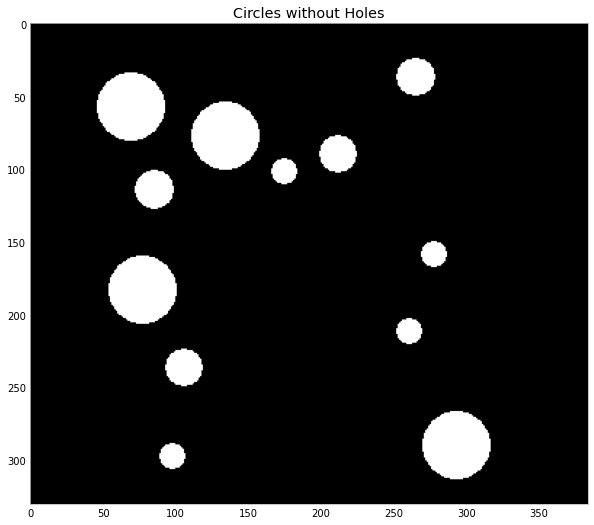

In [55]:
comps_all_objects = get_all_objects(objects_comps)
comps_circles_without_holes = np.setdiff1d(comps_all_objects, np.union1d(comps_with_holes, rectangle_components))
objects_circles_without_holes = show_selected_objects(objects_comps, comps_circles_without_holes)

print("There are", len(comps_circles_without_holes), "circles without holes")
imshow(objects_circles_without_holes, title="Circles without Holes")

<hr>

# Q5)

## Loading Input Image

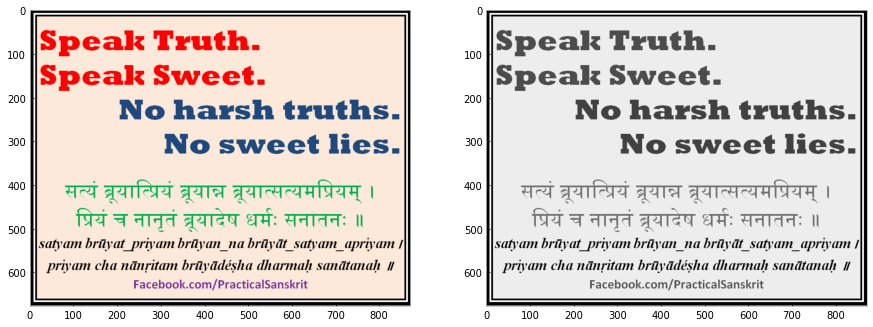

In [56]:
color_txt = cv.imread(IMG_SRC+"colourful_text.png")

color_txt = cv.cvtColor(color_txt, cv.COLOR_BGR2RGB)
txt_bw = cv.cvtColor(color_txt, cv.COLOR_RGB2GRAY)

fig = plt.figure(figsize=(15,15))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

imshow(color_txt, ax=ax1)
imshow(txt_bw, ax=ax2)

<hr>

## Helper Functions

In [18]:
def _dfs(img,i,j,c,vis):
    
    if (img[i,j] == c).all():
        vis[(i,j)] = 1
    else:
        return
    
    h,w,_ = img.shape
    
    if i and (i-1,j) not in vis:
        _dfs(img,i-1,j,c,vis)
    if j and (i,j-1) not in vis:
        _dfs(img,i,j-1,c,vis)
    if i<h-1 and (i+1,j) not in vis:
        _dfs(img,i+1,j,c,vis)
    if j<w-1 and (i,j+1) not in vis:
        _dfs(img,i,j+1,c,vis)
    
    if i and j and (i-1,j-1) not in vis:
        _dfs(img,i-1,j-1,c,vis)
    if i<h-1 and j<w-1 and (i+1,j+1) not in vis:
        _dfs(img,i+1,j+1,c,vis)
    if i and j<w-1 and (i-1,j+1) not in vis:
        _dfs(img,i-1,j+1,c,vis)
    if i<h-1 and j and (i+1,j-1) not in vis:
        _dfs(img,i+1,j-1,c,vis)
    
    return

def n_components_by_color(img, color):
    
    vis = {}
    h,w,_ = img.shape
    color = np.array(color)
    
    n_c = 0
    for i in range(h):
        for j in range(w):
            
            if (img[i,j] == color).all() and ((i,j) not in vis):
                vis[(i,j)] = 1
                _dfs(img,i,j,color,vis)
                n_c += 1
    
    return n_c

def get_colorwise_components(img):
    
    h,w,_ = img.shape
    
    counts = {}
    
    for i in range(h):
        for j in range(w):
            
            c = tuple(img[i,j])
            if c in counts:
                counts[c] += 1
            else:
                counts[c] = 1
    
    n = 0
    for w in sorted(counts, key=counts.get, reverse=True):
        
        if counts[w] > 75000:
            continue
        
        print("Colour:", w, "| Count:", counts[w], "| No. of Components:", n_components_by_color(img, w))
        n += 1
        
    return counts
            
                

<hr>

## 5.1

In [58]:
import sys

sys.setrecursionlimit(100000)
print(sys.getrecursionlimit())

100000


## All Components

In [59]:
get_colorwise_components(color_txt)
pass

Colour: (0, 0, 0) | Count: 44590 | No. of Components: 243
Colour: (31, 73, 125) | Count: 24368 | No. of Components: 27
Colour: (255, 0, 0) | Count: 21948 | No. of Components: 24
Colour: (255, 255, 255) | Count: 14646 | No. of Components: 4
Colour: (0, 176, 80) | Count: 12418 | No. of Components: 74
Colour: (112, 48, 160) | Count: 2358 | No. of Components: 34
Colour: (76, 70, 66) | Count: 733 | No. of Components: 595
Colour: (103, 95, 88) | Count: 682 | No. of Components: 663
Colour: (231, 213, 198) | Count: 622 | No. of Components: 517
Colour: (123, 113, 105) | Count: 563 | No. of Components: 475
Colour: (166, 152, 142) | Count: 549 | No. of Components: 477
Colour: (206, 190, 177) | Count: 530 | No. of Components: 499
Colour: (153, 161, 175) | Count: 517 | No. of Components: 226
Colour: (139, 128, 119) | Count: 516 | No. of Components: 362
Colour: (254, 128, 119) | Count: 472 | No. of Components: 203
Colour: (215, 198, 184) | Count: 446 | No. of Components: 423
Colour: (177, 163, 152) 

## Required 5 Components

As we can see below, the number of components for:
* Red    = 24
* Blue   = 27
* Green  = 74
* Black  = 243
* Purple = 34

In [60]:
cols = [(0,0,0), (112,48,160), (0,176,80), (31,73,125), (255,0,0)]
for col in cols:
    val = n_components_by_color(color_txt, col)
    print(col,":",val)

(0, 0, 0) : 243
(112, 48, 160) : 34
(0, 176, 80) : 74
(31, 73, 125) : 27
(255, 0, 0) : 24


<hr>

## 5.2

In [19]:
def get_holes(holes_comp):
    
    # holes will be small, so we can remove the largest component as that'd be the background
    h,w = holes_comp.shape
    counts = [0 for i in range(int(holes_comp.max()+1))]
    
    for i in range(h):
        for j in range(w):
            counts[int(holes_comp[i,j])] += 1
    
    comps = np.unique(holes_comp)
    comps = np.setdiff1d(comps, np.array(counts).argsort()[-2:])
    
    return comps

def get_objects_with_n_holes(object_inv_comps, holes_comp, objects_comps, n_holes=1):
    
    h,w = object_inv_comps.shape
    
    vis_holes = {}
    to_keep = []
    prev = -1
    
    for i in range(h):
        for j in range(w):
            
            c = object_inv_comps[i,j]
            
            if int(c) in holes_comp and j and prev == 0:
                
                if c in vis_holes:
                    continue
                else:
                    vis_holes[c] = 1
                to_keep += [objects_comps[i,j-1]]
            
            prev = int(c)
            
    final = []
    to_keep = np.array(to_keep)
    for i in to_keep:
        if np.count_nonzero(to_keep == i) == n_holes:
            final += [i]
        
    
    return np.unique(np.array(final))

## Loading Telugu Text

In [20]:
telugu_orig = cv.imread(IMG_SRC+"telugu.jpeg",0)

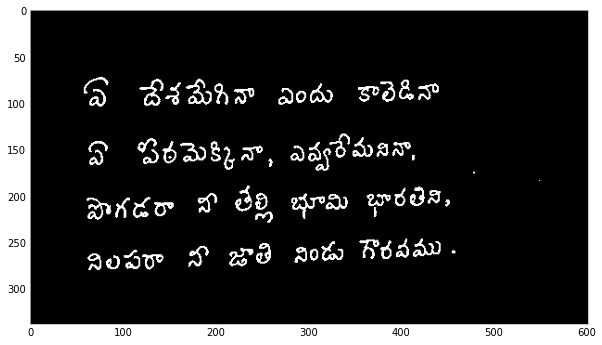

In [37]:
_,telugu = cv.threshold(telugu_orig, 69, 255, cv.THRESH_BINARY)

telugu = cv.adaptiveThreshold(telugu_orig,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY_INV,11,11)
imshow(telugu)

## Getting and Displaying the Coloured Components

In [38]:
telugu_inv_colored, telugu_inv_comps = colored_components(255-telugu, True,4)

In [39]:
telugu_colored, telugu_comps = colored_components(telugu, True, 8)

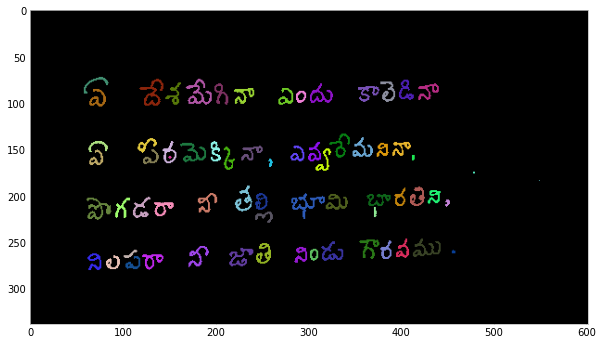

In [40]:
imshow(telugu_colored)

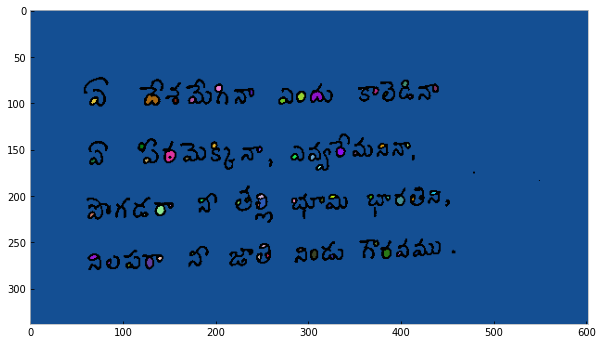

In [41]:
imshow(telugu_inv_colored)

<hr>

## Finding and Displaying Letters with 1 Hole and 2 Holes

In [42]:
holes_comps = get_holes(telugu_inv_comps)
comps_with_1_holes = get_objects_with_n_holes(telugu_inv_comps, holes_comps, telugu_comps, 1)
comps_with_2_holes = get_objects_with_n_holes(telugu_inv_comps, holes_comps, telugu_comps, 2)
telugu_with_1_holes = show_selected_objects(telugu_comps, comps_with_1_holes)
telugu_with_2_holes = show_selected_objects(telugu_comps, comps_with_2_holes)

print("There are", len(comps_with_1_holes), "objects with 1 holes")
print("There are", len(comps_with_2_holes), "objects with 2 holes")

There are 41 objects with 1 holes
There are 9 objects with 2 holes


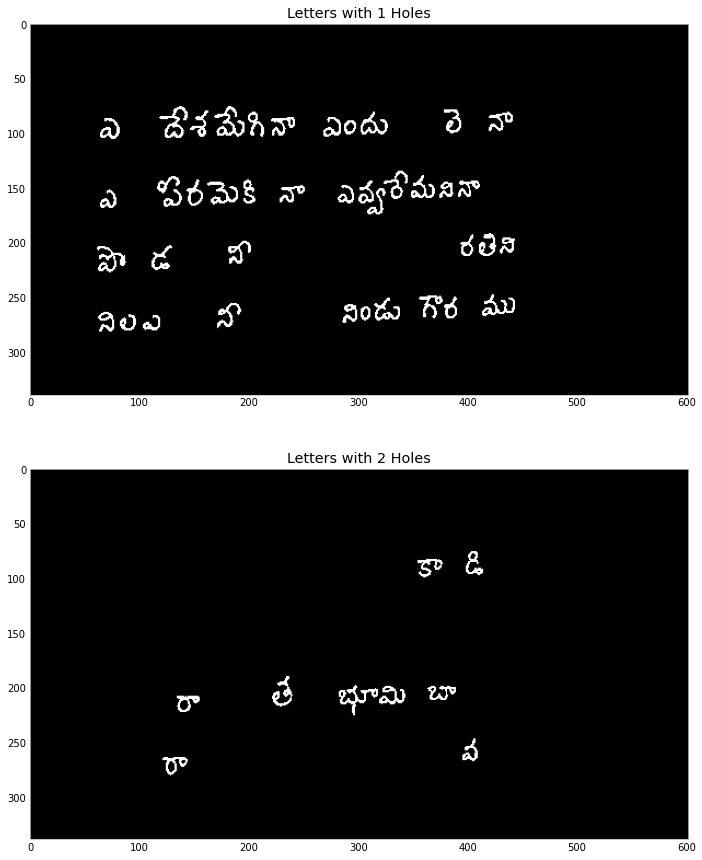

In [43]:
fig = plt.figure(figsize=(15,15))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

imshow(telugu_with_1_holes, title="Letters with 1 Holes", ax=ax1, figsize=(15,15))
imshow(telugu_with_2_holes, title="Letters with 2 Holes", ax=ax2, figsize=(15,15))

<hr>

## Loading Tamil Image

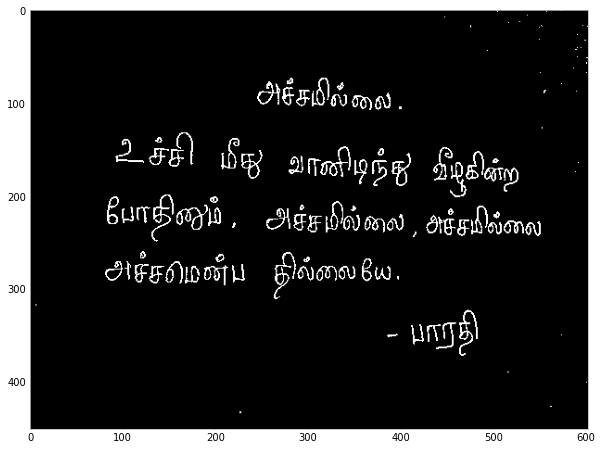

In [70]:
tamil_orig = cv.imread(IMG_SRC+"tamil.jpeg", 0)
tamil = cv.adaptiveThreshold(tamil_orig,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY_INV,15,7)
imshow(tamil)

## Getting and Displaying Colored Components

In [71]:
tamil_inv_colored, tamil_inv_comps = colored_components(255-tamil, True, 4)
tamil_colored, tamil_comps = colored_components(tamil, True, 8)

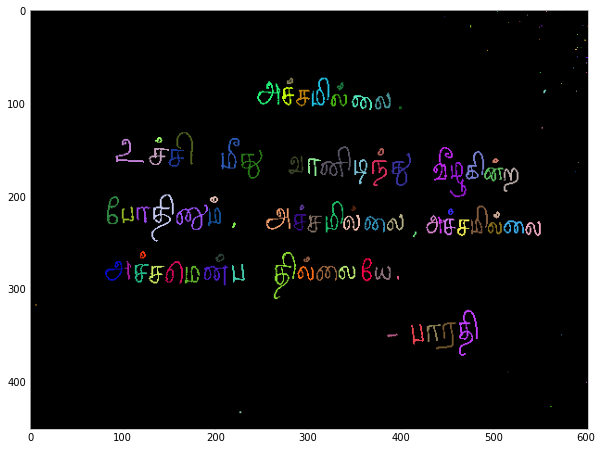

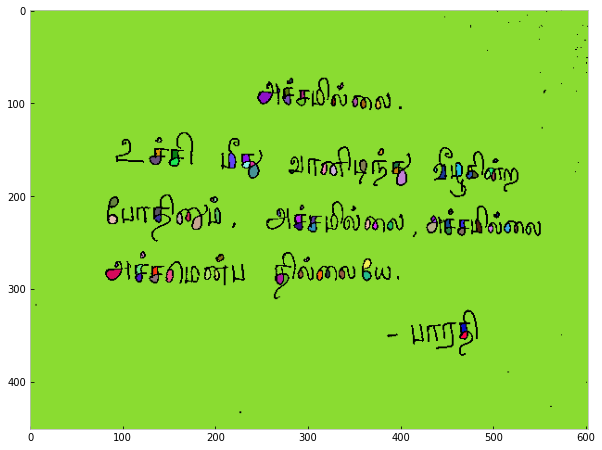

In [72]:
imshow(tamil_colored)
imshow(tamil_inv_colored)

## Finding and Displaying Letters with 1 Hole and 2 Holes

In [73]:
holes_comps = get_holes(tamil_inv_comps)
comps_with_1_holes = get_objects_with_n_holes(tamil_inv_comps, holes_comps, tamil_comps, 1)
comps_with_2_holes = get_objects_with_n_holes(tamil_inv_comps, holes_comps, tamil_comps, 2)
tamil_with_1_holes = show_selected_objects(tamil_comps, comps_with_1_holes)
tamil_with_2_holes = show_selected_objects(tamil_comps, comps_with_2_holes)

print("There are", len(comps_with_1_holes), "objects with 1 holes")
print("There are", len(comps_with_2_holes), "objects with 2 holes")

There are 23 objects with 1 holes
There are 27 objects with 2 holes


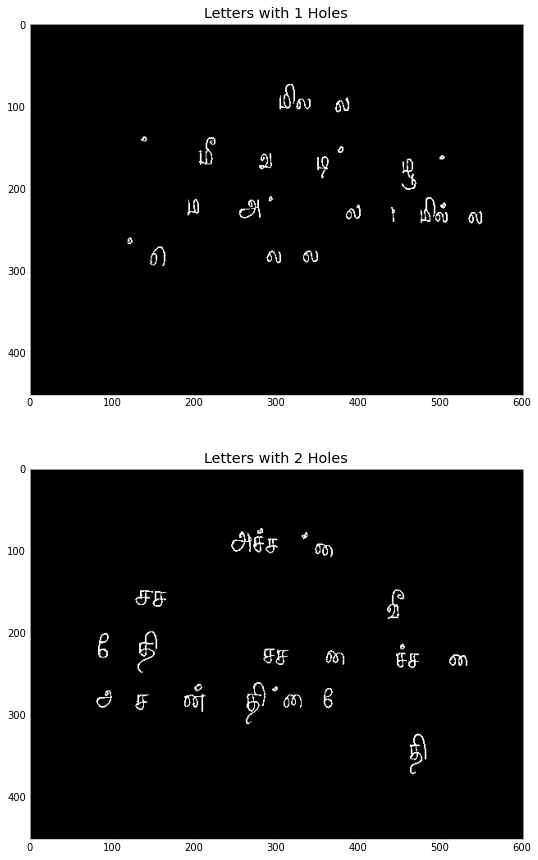

In [74]:
fig = plt.figure(figsize=(15,15))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

imshow(tamil_with_1_holes, title="Letters with 1 Holes", ax=ax1, figsize=(15,15))
imshow(tamil_with_2_holes, title="Letters with 2 Holes", ax=ax2, figsize=(15,15))

<hr>

# Q6)

## 6.1

### Upscaling the Label Map by a Factor of k

To perform the upscaling operation, we would have two ways of approaching the transformation:
* Forward Mapping
* Reverse Mapping

We prefer to use the reverse/backward mapping as it ensures that we do not have holes in the output image which would happen in the case of forward mapping. On doing the reverse mapping, however, we would have some output pixel labels mapped to non integral pixel indices in the input image, for which we would have to estimate/interpolate the label value.

The methods for labelling we have include 2D Nearest Neighbors, 2D Linear Interpolation, 2D Cubic Interpolation, etc. We need to choose the appropriate interpolation method as we are dealing with a label map. 

In the linear and cubic interpolation methods, we notice that we consider the nearby pixel labels to come up with an interpolated label for the current pixel. Since these methods use formulas that resemble $\alpha$ blending, we notice that the label value we might get out of these could be non-integral, ie. we could get a label that does not exist in the image in the first place.

Hence, we should use the **2D Nearest Neighbour** interpolation method to perform the upscaling, as simply use the label that is assigned to the pixel nearest to the one we are currently considering. An implementation of the same is given below.

In [75]:
def scale(img, k):
        
    h,w = img.shape
    res = np.zeros((int(k*h),int(k*w)))
    h2,w2 = res.shape
    
    for i in range (h2):
        for j in range(w2):
            
            oi,oj = round(i/k), round(j/k)
            try:
                res[i,j] = img[oi,oj]
            except:
                res[i,j] = img[oi-1,oj-1]
    
    return res.astype('uint8')

/Users/ahish/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  if sys.path[0] == '':
/Users/ahish/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  del sys.path[0]


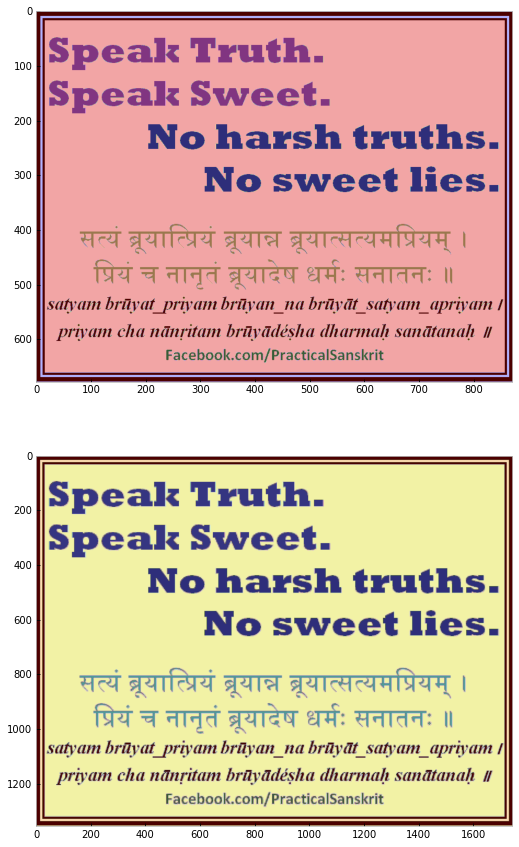

In [76]:
from skimage.color import label2rgb

im_temp = cv.imread(IMG_SRC+"colourful_text.png", 0)
im_scaled = cv.resize(im_temp, (2*im_temp.shape[1], 2*im_temp.shape[0]))

scaled_labels = scale(im_temp, 2)
fig, (ax1, ax2) = plt.subplots(2, figsize=(15,15))

ax1.set_title("Original Image with Labels")
ax2.set_title("Scaled Image with Labels")

imshow(label2rgb(im_temp, im_temp), ax=ax1)
imshow(label2rgb(im_scaled, scaled_labels), ax=ax2)

<hr>

## 6.2

### Rotating the Label Map by an Angle of $\theta$

In this case too, we must use the reverse mapping method, along with the **2D Nearest Neighbour** implementation, as it ensures that we only use the labels present in the input image in the output image, and do not create non-integral labels either. This is important in rotation especially, as the rotation matrix involves trigonometric functions, which rarely give an integral value.

This function is implemented in the next question.

<hr>

# Q7)

## Functions to Perform Rotation

In [77]:
def rot_from_orig(h,w,h1,w1,i,j,rot_m):
    
    c = np.array([
            [i-h1//2],
            [j-w1//2]
        ])
    
    rev_c = rot_m @ c
    
    rev_c[0] += h//2
    rev_c[1] += w//2
    rev_c = np.round(rev_c).flatten().astype('int')
    
    return rev_c

def get_bounds(h, w, rot_m):
    
    p1 = (0,0)
    p2 = (0,w)
    p3 = (h,0)
    p4 = (h,w)
    
    t1 = rot_from_orig(h,w,h,w,*p1,rot_m)
    t2 = rot_from_orig(h,w,h,w,*p2,rot_m)
    t3 = rot_from_orig(h,w,h,w,*p3,rot_m)
    t4 = rot_from_orig(h,w,h,w,*p4,rot_m)
    
    max_w = 0
    max_h = 0
    
    arr = [t1,t2,t3,t4]
    arr.sort(key=lambda x:x[0])
    max_h = arr[-1][0] - arr[0][0]
    arr.sort(key=lambda x:x[1])
    max_w = arr[-1][1] - arr[0][1]
    
    return max_h, max_w
    

def rotImage(img, theta, retain=0):
    
    flag = 0
    if len(img.shape) == 2:
        h,w = img.shape
    else:
        h,w,_ = img.shape
        flag = 1
    
    o = (h//2, w//2)
    rot_m = rot_matrix(-theta)
    
    if retain:
        res = np.zeros(img.shape)
    else:
        if flag:
            res = np.zeros((*get_bounds(h,w,rot_m),3))
        else:
            res = np.zeros(get_bounds(h,w,rot_m))
    
    h1,w1 = res.shape[:2]
    
    for i in range(h1):
        for j in range(w1):
            
            rev_c = rot_from_orig(h,w,h1,w1,i,j,rot_m)
            
            if rev_c[0] >= 0 and rev_c[0] < h and rev_c[1] >= 0 and rev_c[1] < w:
                res[i,j] = img[rev_c[0], rev_c[1]]
    
    return res.astype('uint8')

In [78]:
def rot_matrix(theta):
    theta = np.radians(theta)
    return np.array([
        [+np.cos(theta), -np.sin(theta)],
        [+np.sin(theta), +np.cos(theta)]
    ])

<hr>

## Loading the Rectangle Image

In [79]:
rect_catto = cv.imread(IMG_SRC+"catto.jpg")
rect_catto = cv.cvtColor(rect_catto, cv.COLOR_BGR2RGB)

## Rotation by 30 degrees

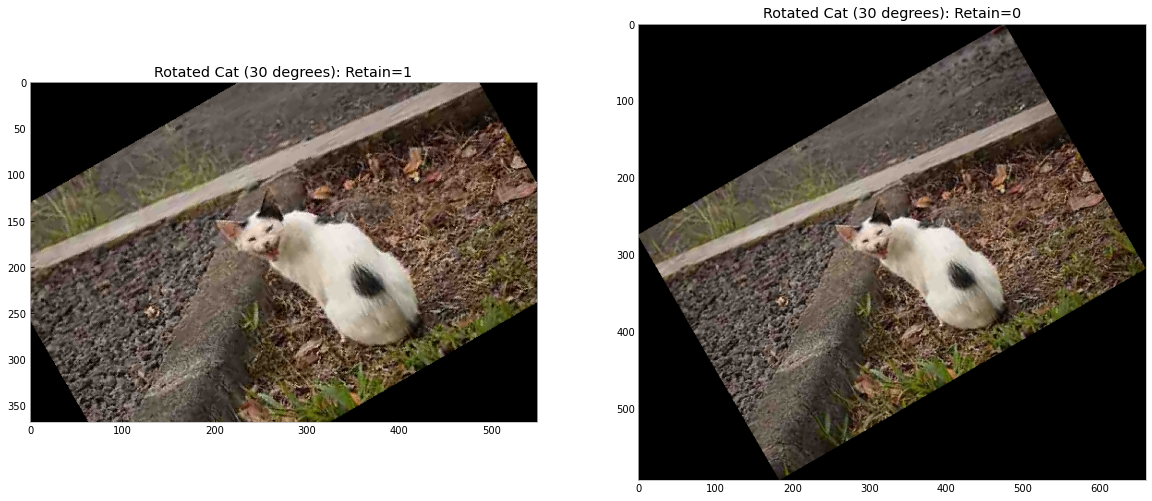

In [80]:
fig = plt.figure(figsize=(20,20))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

r30_retained = rotImage(rect_catto, 30, 1)
r30_noretain = rotImage(rect_catto, 30, 0)

imshow(r30_retained, title="Rotated Cat (30 degrees): Retain=1", ax=ax1)
imshow(r30_noretain, title="Rotated Cat (30 degrees): Retain=0", ax=ax2)

## Rotation by 45 degrees

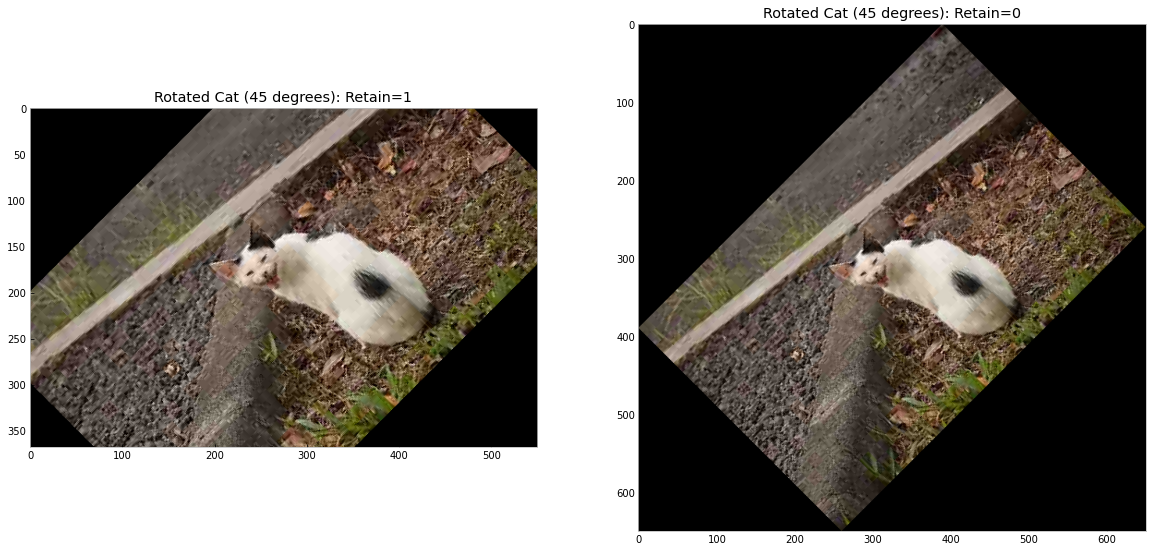

In [81]:
fig = plt.figure(figsize=(20,20))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

r45_retained = rotImage(rect_catto, 45, 1)
r45_noretain = rotImage(rect_catto, 45, 0)

imshow(r45_retained, title="Rotated Cat (45 degrees): Retain=1", ax=ax1)
imshow(r45_noretain, title="Rotated Cat (45 degrees): Retain=0", ax=ax2)

## Rotation by 90 degrees

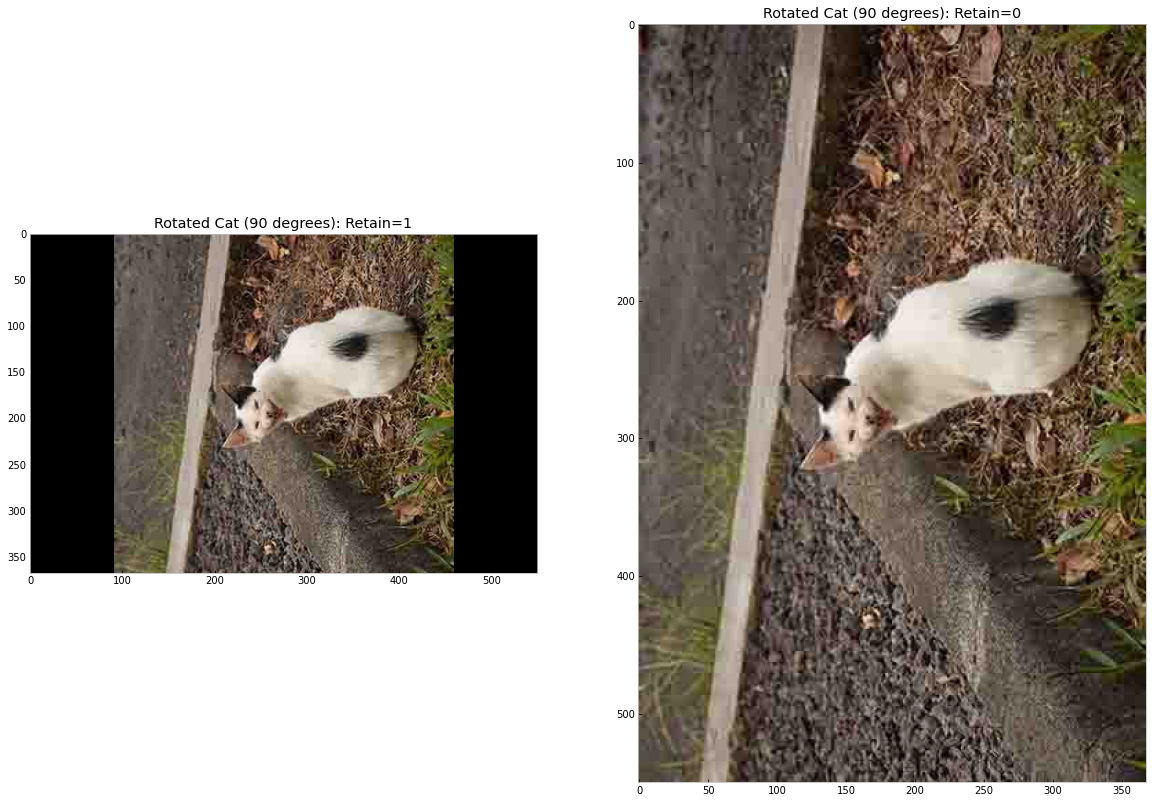

In [82]:
fig = plt.figure(figsize=(20,20))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

r90_retained = rotImage(rect_catto, 90, 1)
r90_noretain = rotImage(rect_catto, 90, 0)

imshow(r90_retained, title="Rotated Cat (90 degrees): Retain=1", ax=ax1)
imshow(r90_noretain, title="Rotated Cat (90 degrees): Retain=0", ax=ax2)

## Rotation by 120 degrees

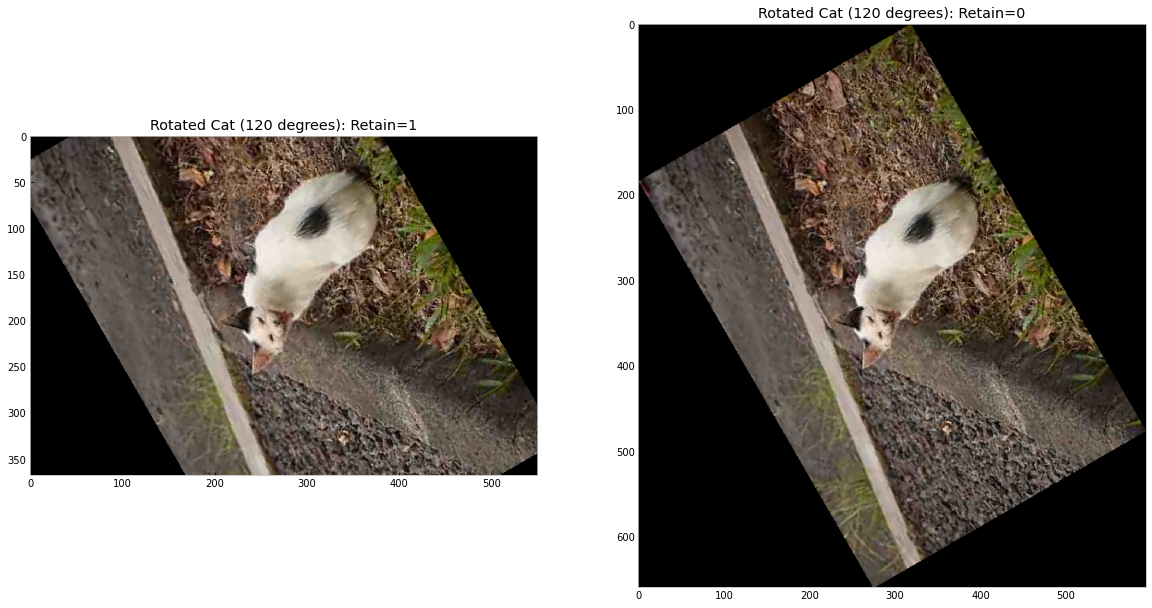

In [83]:
fig = plt.figure(figsize=(20,20))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

r120_retained = rotImage(rect_catto, 120, 1)
r120_noretain = rotImage(rect_catto, 120, 0)

imshow(r120_retained, title="Rotated Cat (120 degrees): Retain=1", ax=ax1)
imshow(r120_noretain, title="Rotated Cat (120 degrees): Retain=0", ax=ax2)

## Rotation by 180 degrees

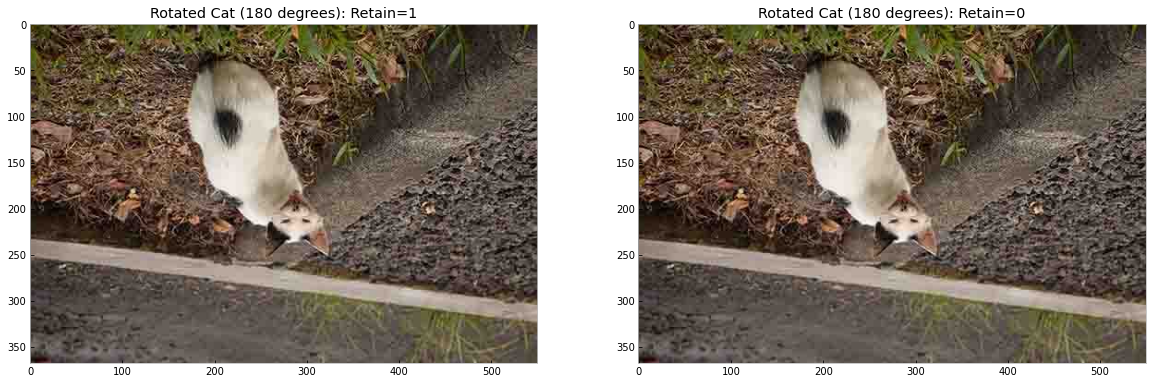

In [84]:
fig = plt.figure(figsize=(20,20))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

r180_retained = rotImage(rect_catto, 180, 1)
r180_noretain = rotImage(rect_catto, 180, 0)

imshow(r180_retained, title="Rotated Cat (180 degrees): Retain=1", ax=ax1)
imshow(r180_noretain, title="Rotated Cat (180 degrees): Retain=0", ax=ax2)

<hr>